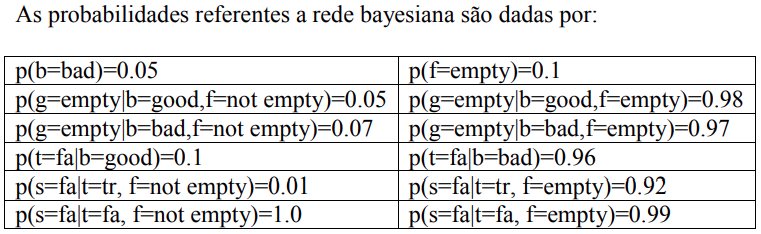

In [14]:
from IPython.display import Image

Image('/content/Probabilidades_RB.png')

a-) Determine o gráfico da rede de crença (rede bayesiana) para este problema

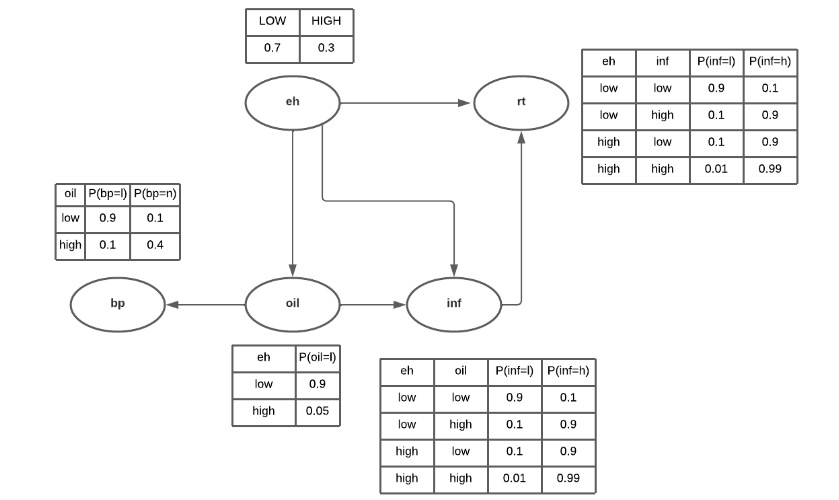

In [15]:
from IPython.display import Image

Image('/content/Grafico_Rede_Bayesiana.png')

b-) Dado que a bp=n e rt=h, qual é a probabilidade de que a inflação seja alta?


In [3]:
!pip install pgmpy

Construindo a Rede bayesiana

In [4]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [5]:
modelo = BayesianModel([('EH', 'RT'), ('EH', 'INF'), ('EH', 'OIL'), ('INF', 'RT'), ('OIL','INF'),('OIL','BP') ])

/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [6]:
print(modelo)

BayesianModel with 5 nodes and 6 edges


Ligando os nós da Rede Bayesiana com sua respecitva dependência

In [7]:
cpd_EconomyHealth = TabularCPD(variable='EH', variable_card=2, values=[[0.7], [0.3]], state_names = { 'EH': ['LOW', 'HIGH'] })

cpd_OIL = TabularCPD(variable='OIL', variable_card=2, values = [[0.9,0.05],[0.1,0.95]], evidence=['EH'], evidence_card=[2], 
                    state_names = {'EH': ['LOW', 'HIGH'], 'OIL': ['LOW', 'HIGH']})

cpd_BritishPetroleum = TabularCPD(variable='BP', variable_card=2, values = [[0.9,0.1], [0.1,0.9]], evidence=['OIL'], evidence_card=[2], 
                   state_names = { 'BP': ['LOW', 'NORMAL'], 'OIL': ['LOW', 'HIGH']})

cpd_Inflation = TabularCPD(variable='INF', variable_card=2, values = [[0.9,0.1,0.1,0.01], [0.1,0.9,0.9,0.99]], evidence=['EH', 'OIL'], 
                     evidence_card=[2,2],  state_names = { 'INF': ['LOW', 'HIGH'],'EH': ['LOW', 'HIGH'],'OIL': ['LOW', 'HIGH']})
                     
cpd_Retailer = TabularCPD(variable='RT', variable_card=2, values = [[0.9,0.1,0.1,0.01],[0.1,0.9,0.9,0.99]],evidence=['INF', 'EH'],
                    evidence_card=[2,2], state_names = { 'INF': ['LOW', 'HIGH'], 'EH': ['LOW', 'HIGH'], 'RT': ['LOW', 'HIGH']})

In [8]:
modelo.add_cpds(cpd_EconomyHealth,cpd_OIL,cpd_BritishPetroleum,cpd_Inflation,cpd_Retailer)
modelo.get_cpds()

[<TabularCPD representing P(EH:2) at 0x7f1aad0bc070>,
 <TabularCPD representing P(OIL:2 | EH:2) at 0x7f1aad0bc0d0>,
 <TabularCPD representing P(BP:2 | OIL:2) at 0x7f1aad0bc040>,
 <TabularCPD representing P(INF:2 | EH:2, OIL:2) at 0x7f1aad0bc0a0>,
 <TabularCPD representing P(RT:2 | INF:2, EH:2) at 0x7f1aad0c2070>]

In [9]:
print('Economy Health')
print(cpd_EconomyHealth)
print('\nOil')
print(cpd_OIL)
print('\nInflation')
print(cpd_Inflation)
print('\nBritish Petroleum Stock Price')
print(cpd_BritishPetroleum)
print('\nRetailer Stock Price')
print(cpd_Retailer)

Economy Health
+----------+-----+
| EH(LOW)  | 0.7 |
+----------+-----+
| EH(HIGH) | 0.3 |
+----------+-----+

Oil
+-----------+---------+----------+
| EH        | EH(LOW) | EH(HIGH) |
+-----------+---------+----------+
| OIL(LOW)  | 0.9     | 0.05     |
+-----------+---------+----------+
| OIL(HIGH) | 0.1     | 0.95     |
+-----------+---------+----------+

Inflation
+-----------+----------+-----------+----------+-----------+
| EH        | EH(LOW)  | EH(LOW)   | EH(HIGH) | EH(HIGH)  |
+-----------+----------+-----------+----------+-----------+
| OIL       | OIL(LOW) | OIL(HIGH) | OIL(LOW) | OIL(HIGH) |
+-----------+----------+-----------+----------+-----------+
| INF(LOW)  | 0.9      | 0.1       | 0.1      | 0.01      |
+-----------+----------+-----------+----------+-----------+
| INF(HIGH) | 0.1      | 0.9       | 0.9      | 0.99      |
+-----------+----------+-----------+----------+-----------+

British Petroleum Stock Price
+------------+----------+-----------+
| OIL        | OIL(L

Calculando a Inferencia através do algoritmo de elimanações de variaves do nosso modelo

Devemos saber qual é a probabilidade de que a inflação seja alta? Dado que a bp=n e rt=h. 

In [10]:
from pgmpy.inference import VariableElimination
inferencia = VariableElimination(modelo)

In [12]:
print(inferencia.query(['INF'], evidence={'BP': 'NORMAL', 'RT': 'HIGH'}))

+-----------+------------+
| INF       |   phi(INF) |
+===========+============+
| INF(LOW)  |     0.0275 |
+-----------+------------+
| INF(HIGH) |     0.9725 |
+-----------+------------+


/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


De acordo como Nosso Modelo a probabilidade de que a inflação seja alta é de 97,25%